In [329]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

***Data Wrangling: Gathering Data***


In [330]:
df=pd.read_csv("twitter-archive-enhanced.csv")

In [331]:
#df.describe()

In [332]:
#df.info() # we do have a lot of null values

In [333]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [334]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [335]:
dfImage = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [336]:
dfImage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [337]:
# My request was declined
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
       # count += 1
       # print(str(count) + ": " + str(tweet_id))
       # try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [338]:
# source from gitHub
collected =[]
not_collected = [] # to avoid error/exception messages

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(df['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(tweet_id)
        except Exception as e:
            not_collected.append(tweet_id)

In [339]:
with open('tweet-json.txt', 'r') as f:
    tweets = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**ASSESSING DATA**

In [340]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [342]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [343]:
df[df['rating_denominator'] == 0 ] # delete this row

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [344]:
df[df['rating_denominator'] > 10 ] # delete these rows







,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [345]:
df[df['rating_denominator'] < 10 ] # delete these row

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [346]:
df.isnull().sum() # i will delete these coulmns 

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [347]:
# check inside the text values for non dog related tweets
df.text[df.text.str.match('.*only rate dogs')]


25      This... is a Jubilant Antarctic House Bear. We...
59      Ugh not again. We only rate dogs. Please don't...
93      I can't believe this keeps happening. This, is...
118     RT @dog_rates: We only rate dogs. This is quit...
127     Unbelievable. We only rate dogs. Please don't ...
131     Oh my this spooked me up. We only rate dogs, n...
141     We only rate dogs. Please don't send in Jesus....
154     We only rate dogs. Please don't send perfectly...
169     We only rate dogs. This is quite clearly a smo...
193     Guys, we only rate dogs. This is quite clearly...
221     Seriously guys? Again? We only rate dogs. Plea...
226     Please stop sending in animals other than dogs...
246     C'mon guys. Please only send in dogs. We only ...
314     We only rate dogs. Please don't send in any no...
386     RT @dog_rates: Please only send in dogs. We on...
390     We only rate dogs. Please don't send in any mo...
411     RT @dog_rates: We only rate dogs. Please don't...
416     Please

In [348]:
len(df.text[df.text.str.match('.*only rate dogs')])


64

In [349]:
sum(df.duplicated()) 

0

in this dataFrame i noticed that: 
- denominator less than 10 
- denominator greater than 10 
- many null values
- additional information about other animals (64)
- timestamp is an object 

In [350]:
dfImage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [351]:
dfImage.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [352]:
dfImage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [353]:
dfImage.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [354]:
dfImage.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [355]:
dfImage.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
Samoyed                            20
toy_terrier                        20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [356]:
dfImage.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

**some of the species are not dogs**

In [357]:
sum(dfImage.duplicated())

0

In [358]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [359]:
tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [360]:
tweets.info() # a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**Assessment report**

-Tidiness issues

- columns (doggo, floofer, pupper and puppo) don't need to be seperated in archive twitter 
- Information about one type of observational unit (tweets) is spread across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.

 
-Quality issues 

- timestamp and  retweeted_status_timestamp are saved as objects instead of data/time 
- one value where the denominator is 0 
- values where the nominator is 0
- values where denominator greater than 10 
- values where denominator less than 10 
- missing values in archive twitter 
- none values instead of null in (doggo, floofer, pupper and puppo) 
- some images data are not dogs 
- Replace 'None' with np.nan to indicate the missing values
- no bread in imagae data should be dealt with 
- multipe dog breads in one row needs to be fixed by seperating them with commas
- some names such as ('a', 'the') are not dog names 










## Data cleaning 

**Cleaning twitter archive**

In [361]:
twitterClean = df.copy() # making a clean copy


**Define**



Remove multiple dog stages in in Rows and merge these columns into one

**Code**

In [362]:
twitterClean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})




,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [363]:
# dogger, pupper...etc 

twitterClean.loc[twitterClean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
twitterClean.loc[twitterClean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
twitterClean.loc[twitterClean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
twitterClean.loc[twitterClean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [364]:
twitterClean.doggo.replace('None', '', inplace=True)

In [365]:
twitterClean.doggo.replace(np.NaN, '', inplace=True)

In [366]:
twitterClean.floofer.replace('None', '', inplace=True)

In [367]:
twitterClean.floofer.replace(np.NaN, '', inplace=True)

In [368]:
twitterClean.pupper.replace('None', '', inplace=True)

In [369]:
twitterClean.pupper.replace(np.NaN, '', inplace=True)

In [370]:
twitterClean.puppo.replace('None', '', inplace=True)

In [371]:
twitterClean.puppo.replace(np.NaN, '', inplace=True)

In [372]:
twitterClean['dog_class'] = twitterClean.doggo + twitterClean.floofer + twitterClean.pupper + twitterClean.puppo
twitterClean.loc[twitterClean.dog_class == 'doggopupper', 'dog_class'] = 'doggo, pupper'
twitterClean.loc[twitterClean.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo'
twitterClean.loc[twitterClean.dog_class == 'doggofloofer', 'dog_class'] = 'doggo, floofer'

**Test the code**

In [373]:
twitterClean.dog_class.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_class, dtype: int64

In [374]:
#twitterClean.head()

**Define**

merge the four columns to one column called dog_stages

**code**

In [375]:
twitterClean = twitterClean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)




**Test**

In [376]:
twitterClean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


**Define**


Clean the dog names

**code**


In [377]:
twitterClean['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
Toby         7
an           7
Daisy        7
Bailey       7
Oscar        6
Bella        6
Name: name, dtype: int64

In [378]:
incorrectName = ['a','the','an']
for i in incorrectName:
        twitterClean['name'].replace(i, 'None', inplace=True)

**Test**

In [379]:
twitterClean['name'].value_counts().head(20)

None       815
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
Toby         7
Bailey       7
Daisy        7
Buddy        7
Oscar        6
Dave         6
Milo         6
Leo          6
Rusty        6
Name: name, dtype: int64

**Define**

Remove the retweet related Rows

**Code**

In [380]:
twitterClean = twitterClean[twitterClean['in_reply_to_status_id'].isnull()]






**Test**

In [381]:
twitterClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
dog_class                     2278 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 267.0+ KB


**Define**

fixing the incorrect values of the numerator. since most values range between [10-14] i will delete all values higher than 14

**code**

In [382]:
twitterClean.rating_numerator.value_counts()





12      544
10      455
11      451
13      331
9       155
8       102
7        53
14       49
5        35
6        32
3        19
4        16
2         9
1         6
75        2
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
15        1
27        1
45        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [383]:
twitterClean = twitterClean[twitterClean['rating_numerator'] < 14 ]

**Test**

In [384]:
len(twitterClean[twitterClean['rating_numerator'] > 14 ])



0

**Define**

convert None values into np.nan

**Code**

In [385]:
twitterClean =  twitterClean.replace('None', np.nan)

In [386]:
#twitterClean.head()

**Define** 

changing the time into timestamp/data format for the column timestamp

**Code**

In [387]:
twitterClean.timestamp = pd.to_datetime(twitterClean.timestamp)

**Test**

In [388]:
twitterClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2209 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
text                          2209 non-null object
retweeted_status_id           168 non-null float64
retweeted_status_user_id      168 non-null float64
retweeted_status_timestamp    168 non-null object
expanded_urls                 2206 non-null object
rating_numerator              2209 non-null int64
rating_denominator            2209 non-null int64
name                          1509 non-null object
dog_class                     2209 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 258.9+ KB


**Define** 

changing the time into timestamp/data format for the column retweeted_status_timestamp

**code**

In [389]:
twitterClean.retweeted_status_timestamp = pd.to_datetime(twitterClean.retweeted_status_timestamp)

**Test**


In [390]:
twitterClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2209 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
text                          2209 non-null object
retweeted_status_id           168 non-null float64
retweeted_status_user_id      168 non-null float64
retweeted_status_timestamp    168 non-null datetime64[ns]
expanded_urls                 2206 non-null object
rating_numerator              2209 non-null int64
rating_denominator            2209 non-null int64
name                          1509 non-null object
dog_class                     2209 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 258.9+ KB


**Define** 

Fixing the numerator and denominator values

**Code**

In [391]:
twitterClean = twitterClean[twitterClean['rating_numerator'] != 0 ]
twitterClean = twitterClean[twitterClean['rating_denominator'] != 0 ]
twitterClean = twitterClean[twitterClean['rating_denominator'] == 10 ]






**Test**

In [392]:
len(twitterClean[twitterClean['rating_denominator'] < 10 ])

0

In [393]:
len(twitterClean[twitterClean['rating_denominator'] > 10 ])

0

In [394]:
len(twitterClean[twitterClean['rating_denominator'] == 0 ])

0

In [395]:
#twitterClean.head()

**Define**


Fixing rating numerator


**Code**

In [396]:
twitterClean['rating_numerator'] = pd.to_numeric(twitterClean['rating_numerator'], downcast='float')


In [397]:
twitterClean.rating_numerator = twitterClean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)






In [398]:
twitterClean['rating_numerator'] = pd.to_numeric(twitterClean['rating_numerator'], downcast='float')


**Test**

In [399]:
twitterClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2203 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2203 non-null datetime64[ns]
source                        2203 non-null object
text                          2203 non-null object
retweeted_status_id           167 non-null float64
retweeted_status_user_id      167 non-null float64
retweeted_status_timestamp    167 non-null datetime64[ns]
expanded_urls                 2200 non-null object
rating_numerator              2203 non-null float32
rating_denominator            2203 non-null int64
name                          1508 non-null object
dog_class                     2203 non-null object
dtypes: datetime64[ns](2), float32(1), float64(4), int64(2), object(5)
memory usage: 249.6+ KB


In [400]:
twitterClean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,


**Define** 

Dropping unnecessary columns

**Code**

In [401]:
# dropping unececary columns 
twitterClean = twitterClean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'source'], axis=1)







**Test**

In [402]:
twitterClean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,


In [403]:
twitterClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2203 non-null int64
timestamp             2203 non-null datetime64[ns]
text                  2203 non-null object
rating_numerator      2203 non-null float32
rating_denominator    2203 non-null int64
name                  1508 non-null object
dog_class             2203 non-null object
dtypes: datetime64[ns](1), float32(1), int64(2), object(3)
memory usage: 129.1+ KB


In [404]:
#twitterClean.head()

**Cleaning Image data**

In [405]:
ImageClean = dfImage.copy() # making a clean copy

In [406]:
ImageClean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define** 

Sorting columns P1 and p2 and p3 to one column and p1_conf, p2_conf and p3_conf to one column  

**Code**

In [407]:
# form gitHub
breed = []
confidence = []
def dog_breed_confidence(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog :
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('No breed')
        confidence.append(0)
# apply the function row wise        
ImageClean.apply(dog_breed_confidence,axis =1)
# assign the new column names
ImageClean['dog_breed'] = breed
ImageClean['confidence'] = confidence
# drop the un needed columns now
ImageClean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)

**Test**

In [408]:
ImageClean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


**Define** 

only allowing values with  confidence > 0.5 for better results

**Code**

In [409]:
ImageClean = ImageClean[ImageClean['confidence'] > 0.5 ]

**Test**

In [410]:
ImageClean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517


In [411]:
ImageClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 1 to 2072
Data columns (total 5 columns):
tweet_id      973 non-null int64
jpg_url       973 non-null object
img_num       973 non-null int64
dog_breed     973 non-null object
confidence    973 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 45.6+ KB


**cleaning tweets**

In [412]:
cleanTweets= tweets.copy() # making a clean copy

In [413]:
cleanTweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [414]:
cleanTweets.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

**Define** 

renaming ID to be able to merge the dataframes later

**code**

In [415]:
cleanTweets = cleanTweets.rename(columns={'id':'tweet_id'})

**test**

In [416]:
cleanTweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**Define** 

Deleting unneeded columns with many null values

**code**

In [417]:
cleanTweets = cleanTweets.filter(['tweet_id','favorite_count','retweet_count',  'user'] )






**Test**

In [418]:
cleanTweets.head()

,tweet_id,favorite_count,retweet_count,user
0,892420643555336193,39467,8853,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,33819,6514,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,25461,4328,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,42908,8964,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,41048,9774,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [419]:
#cleanTweets.shape

In [420]:
#ImageClean.shape

In [421]:
#twitterClean.shape

In [422]:
#twitterClean.head(1)

In [423]:
#ImageClean.head(1)

In [424]:
FinalDF=pd.merge(twitterClean, ImageClean, how='outer', on=['tweet_id'])






In [425]:
FinalDF = pd.merge(FinalDF, cleanTweets, how = 'outer', on=['tweet_id'])




In [426]:
FinalDF.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,dog_breed,confidence,favorite_count,retweet_count,user
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,NaN,NaN,NaN,NaN,39467.0,8853.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,NaN,NaN,NaN,NaN,33819.0,6514.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25461.0,4328.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,NaN,NaN,NaN,NaN,42908.0,8964.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,41048.0,9774.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [427]:
FinalDF.to_csv('twitter_archive_master.csv')




In [428]:
FinalDF.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,dog_breed,confidence,favorite_count,retweet_count,user
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,NaN,NaN,NaN,NaN,39467.0,8853.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,NaN,NaN,NaN,NaN,33819.0,6514.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25461.0,4328.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,NaN,NaN,NaN,NaN,42908.0,8964.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,41048.0,9774.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [445]:
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null int64
timestamp             2203 non-null datetime64[ns]
text                  2203 non-null object
rating_numerator      2203 non-null float32
rating_denominator    2203 non-null float64
name                  1508 non-null object
dog_class             2203 non-null object
jpg_url               973 non-null object
img_num               973 non-null float64
dog_breed             973 non-null object
confidence            973 non-null float64
favorite_count        2354 non-null float64
retweet_count         2354 non-null float64
user                  2354 non-null object
dtypes: datetime64[ns](1), float32(1), float64(5), int64(1), object(6)
memory usage: 346.9+ KB


In [446]:
FinalDF.dropna(axis=0, subset=['dog_class'])

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,dog_breed,confidence,favorite_count,retweet_count,user
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,NaN,NaN,NaN,NaN,39467.0,8853.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,NaN,NaN,NaN,NaN,33819.0,6514.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25461.0,4328.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,NaN,NaN,NaN,NaN,42908.0,8964.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,41048.0,9774.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,NaN,,NaN,NaN,NaN,NaN,20562.0,3261.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,NaN,NaN,NaN,NaN,12041.0,2158.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10.0,NaN,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,56848.0,16716.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,NaN,NaN,NaN,NaN,28226.0,4429.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,31166.0,7624.0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f042ea14550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f042e81bf60>]], dtype=object)

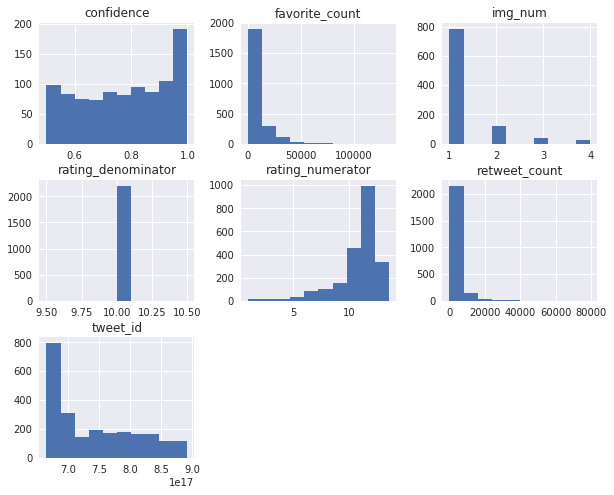

In [447]:
FinalDF.hist(figsize=(10,8))

Text(0,0.5,'Frequency')

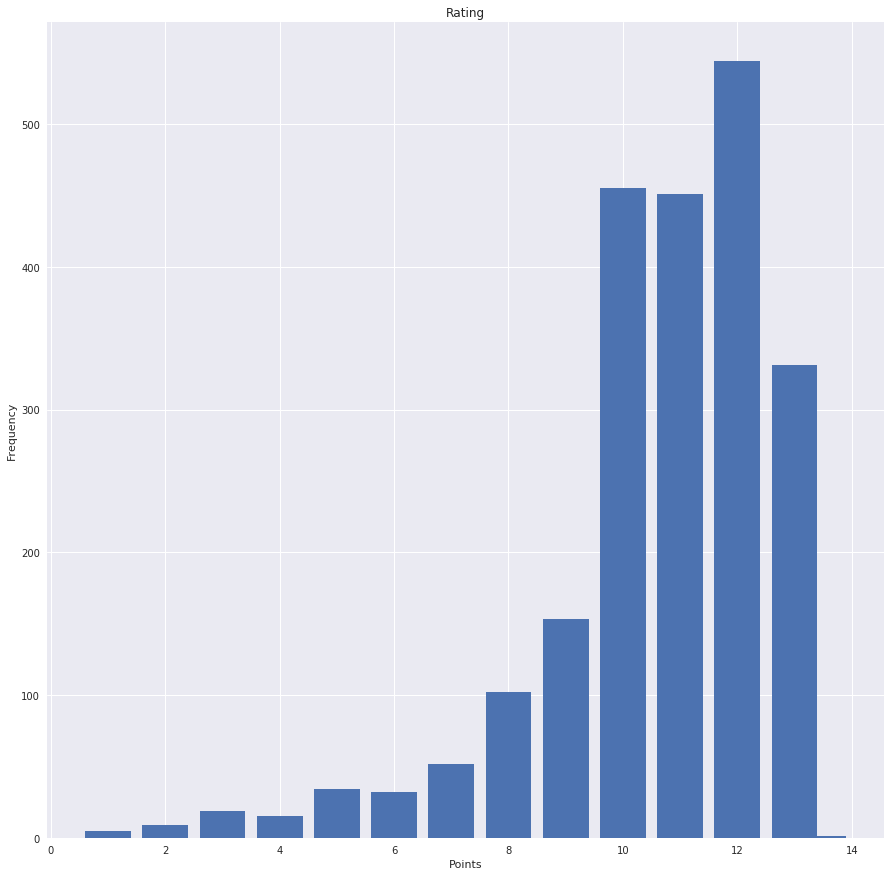

In [449]:
#fig, ax = plt.subplots()
# plot histogram
#ax.hist(FinalDF['rating_numerator'].mean())
# set title and labels
#ax.set_title('Rating')
#ax.set_xlabel('Points')
#ax.set_ylabel('Frequency')
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = FinalDF['rating_numerator'].value_counts().head(15)
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Rating') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

**of the first 15 most occuring ratings, Most rating range between [10-13]**


Text(0.5,1,'Favorites as a Function of Retweets')

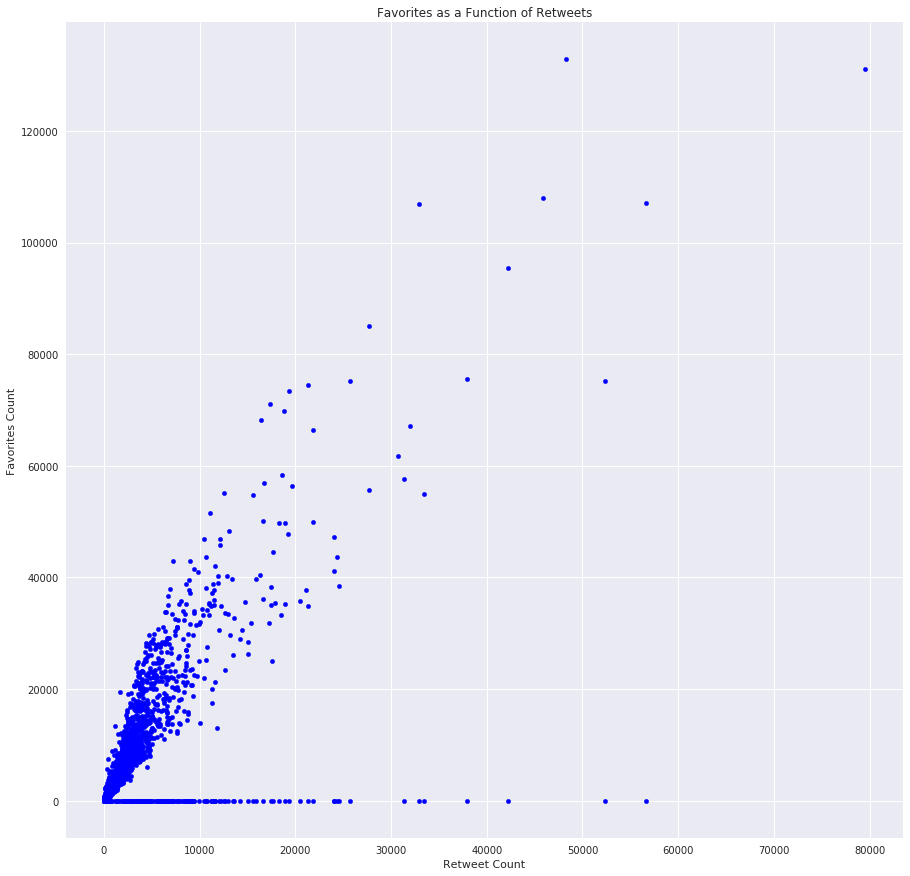

In [452]:
FinalDF.plot(x= 'retweet_count', y = 'favorite_count', kind='scatter', color='blue')
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')


**Most liked dog class**

In [453]:
FinalDF.groupby('dog_class')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_class,,,,,,,,
,1850.0,7776.712973,10926.134362,0.0,1313.75,3568.0,9824.0,107956.0
doggo,70.0,14906.571429,19277.459000,0.0,5301.00,10117.0,15308.0,131075.0
"doggo, floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.0,17169.0
"doggo, pupper",11.0,10339.272727,12023.773868,0.0,5734.50,8735.0,10021.5,44619.0
"doggo, puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.0,47844.0
floofer,9.0,11064.444444,10680.460853,1618.0,4015.00,6076.0,12456.0,33345.0
pupper,232.0,6075.133621,9578.651616,0.0,2112.75,3094.0,6443.0,106827.0
puppo,27.0,16329.851852,25477.134025,0.0,5099.50,10132.0,19038.5,132810.0


**most retweeted dog class**

In [454]:
FinalDF.groupby('dog_class')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_class,,,,,,,,
,1850.0,2976.345946,4614.270316,16.0,611.0,1416.5,3556.5,56625.0
doggo,70.0,6657.442857,12632.759627,725.0,1986.5,3227.5,5133.0,79515.0
"doggo, floofer",1.0,3433.000000,NaN,3433.0,3433.0,3433.0,3433.0,3433.0
"doggo, pupper",11.0,5389.090909,6080.706299,1265.0,2477.0,2961.0,3520.0,17621.0
"doggo, puppo",1.0,19196.000000,NaN,19196.0,19196.0,19196.0,19196.0,19196.0
floofer,9.0,4155.888889,5590.254566,496.0,1141.0,2509.0,3825.0,18497.0
pupper,232.0,2704.418103,4296.952816,26.0,706.5,1271.0,3129.0,32883.0
puppo,27.0,5866.296296,9024.846015,716.0,1593.5,3220.0,7541.5,48265.0


**highest rated dog breed**

In [455]:

FinalDF.groupby('dog_class')['rating_numerator'].describe()



,count,mean,std,min,25%,50%,75%,max
dog_class,,,,,,,,
,1851.0,10.555646,2.154288,1.0,10.0,11.0,12.0,13.5
doggo,70.0,11.571428,1.346724,8.0,11.0,12.0,13.0,13.0
"doggo, floofer",1.0,11.000000,NaN,11.0,11.0,11.0,11.0,11.0
"doggo, pupper",11.0,11.272727,2.195036,5.0,12.0,12.0,12.0,13.0
"doggo, puppo",1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0
floofer,9.0,11.888889,1.054093,10.0,11.0,12.0,13.0,13.0
pupper,233.0,10.673820,1.662479,3.0,10.0,11.0,12.0,13.0
puppo,27.0,12.000000,1.143544,9.0,12.0,12.0,13.0,13.0


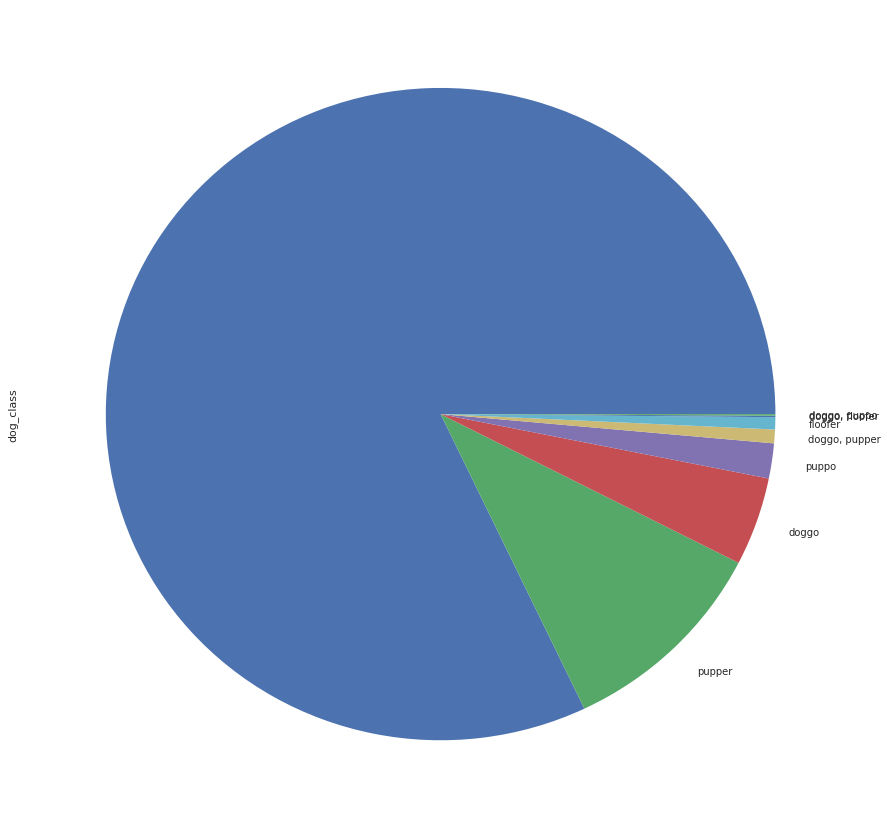

In [456]:
FinalDF[FinalDF.rating_numerator>10]['dog_class'].value_counts().plot.pie()

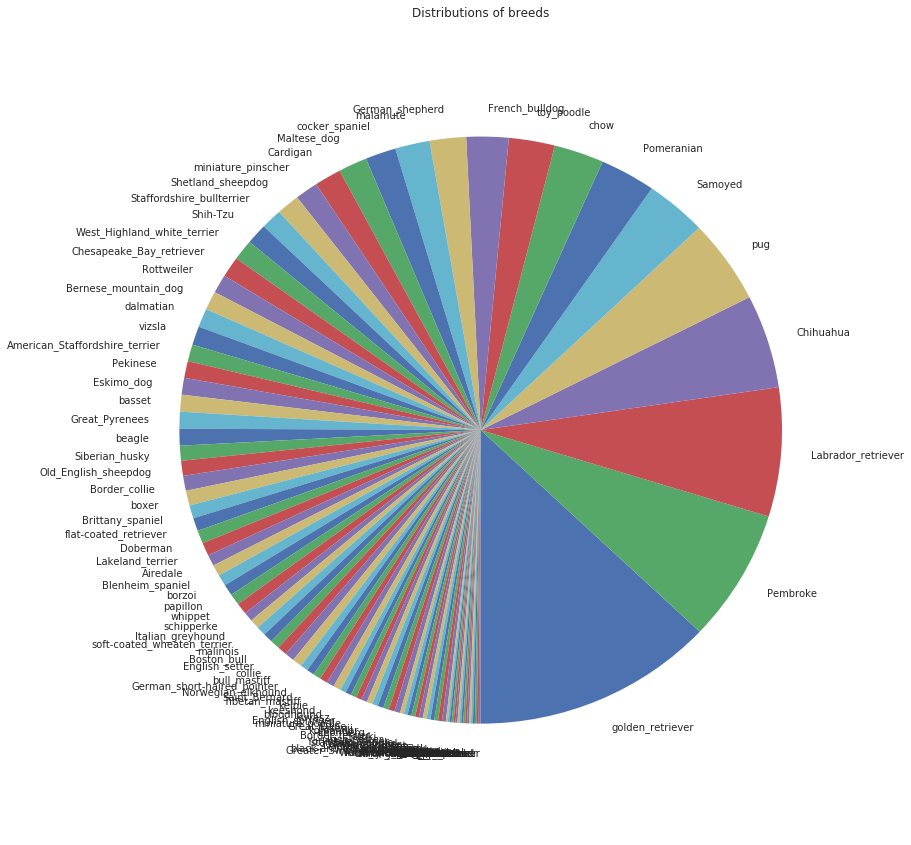

In [457]:
breed = FinalDF[pd.notnull(FinalDF.dog_breed)]
plt.rcParams['figure.figsize']=(15,15)
breed.dog_breed.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds')
plt.ylabel('')
plt.show();
